In [ ]:
import pandas as pd
import numpy as np


df = pd.read_csv("train.csv", parse_dates=["Date"])
df = df.sort_values(by=["Store", "Dept", "Date"]).reset_index(drop=True)

df.head()


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,01-04-2011,20398.09,False
1,1,1,01-06-2012,16065.49,False
2,1,1,01-07-2011,15363.50,False
3,1,1,01-10-2010,20094.19,False
4,1,1,02-03-2012,20113.03,False


In [4]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week.astype('Int64')
df['DayOfWeek'] = df['Date'].dt.dayofweek 
df['Quarter'] = df['Date'].dt.quarter

df[['Date','Year','Month','Week','DayOfWeek','Quarter']].head()

,Date,Year,Month,Week,DayOfWeek,Quarter
0,2011-01-04,2011.0,1.0,1,1.0,1.0
1,2012-01-06,2012.0,1.0,1,4.0,1.0
2,2011-01-07,2011.0,1.0,1,4.0,1.0
3,2010-01-10,2010.0,1.0,1,6.0,1.0
4,2012-02-03,2012.0,2.0,5,4.0,1.0


In [5]:
df['Lag_1'] = df.groupby(['Store','Dept'])['Weekly_Sales'].shift(1)
df['Lag_2'] = df.groupby(['Store','Dept'])['Weekly_Sales'].shift(2)
df['Lag_4'] = df.groupby(['Store','Dept'])['Weekly_Sales'].shift(4)

df[['Store','Dept','Date','Weekly_Sales','Lag_1','Lag_2','Lag_4']].head(10)


,Store,Dept,Date,Weekly_Sales,Lag_1,Lag_2,Lag_4
0,1,1,2011-01-04,20398.09,NaN,NaN,NaN
1,1,1,2012-01-06,16065.49,20398.09,NaN,NaN
2,1,1,2011-01-07,15363.50,16065.49,20398.09,NaN
3,1,1,2010-01-10,20094.19,15363.50,16065.49,NaN
4,1,1,2012-02-03,20113.03,20094.19,15363.50,20398.09
5,1,1,2010-02-04,57258.43,20113.03,20094.19,16065.49
6,1,1,2010-02-07,16333.14,57258.43,20113.03,15363.50
7,1,1,2011-02-09,15277.27,16333.14,57258.43,20094.19
8,1,1,2011-02-12,25293.49,15277.27,16333.14,20113.03
9,1,1,2012-03-02,23510.49,25293.49,15277.27,57258.43


In [6]:
df['Roll_Mean_4'] = df.groupby(['Store','Dept'])['Weekly_Sales'].shift(1).rolling(window=4).mean()
df['Roll_Std_4'] = df.groupby(['Store','Dept'])['Weekly_Sales'].shift(1).rolling(window=4).std()

df[['Store','Dept','Date','Weekly_Sales','Roll_Mean_4','Roll_Std_4']].head(15)


,Store,Dept,Date,Weekly_Sales,Roll_Mean_4,Roll_Std_4
0,1,1,2011-01-04,20398.09,NaN,NaN
1,1,1,2012-01-06,16065.49,NaN,NaN
2,1,1,2011-01-07,15363.50,NaN,NaN
3,1,1,2010-01-10,20094.19,NaN,NaN
4,1,1,2012-02-03,20113.03,17980.3175,2634.918025
5,1,1,2010-02-04,57258.43,17909.0525,2550.222404
6,1,1,2010-02-07,16333.14,28207.2875,19495.906523
7,1,1,2011-02-09,15277.27,28449.6975,19287.893997
8,1,1,2011-02-12,25293.49,27245.4675,20116.048532
9,1,1,2012-03-02,23510.49,28540.5825,19665.498431


In [7]:
df['Store_Avg_Sales'] = df.groupby('Store')['Weekly_Sales'].transform('mean')
df['Dept_Avg_Sales'] = df.groupby('Dept')['Weekly_Sales'].transform('mean')

df['Norm_Sales'] = df['Weekly_Sales'] / df['Store_Avg_Sales']

df[['Store','Dept','Weekly_Sales','Store_Avg_Sales','Dept_Avg_Sales','Norm_Sales']].head()


,Store,Dept,Weekly_Sales,Store_Avg_Sales,Dept_Avg_Sales,Norm_Sales
0,1,1,20398.09,21710.543621,19213.485088,0.939548
1,1,1,16065.49,21710.543621,19213.485088,0.739986
2,1,1,15363.50,21710.543621,19213.485088,0.707652
3,1,1,20094.19,21710.543621,19213.485088,0.925550
4,1,1,20113.03,21710.543621,19213.485088,0.926418


In [8]:
df['Holiday_Before'] = df.groupby(['Store','Dept'])['IsHoliday'].shift(1).fillna(False)
df['Holiday_After']  = df.groupby(['Store','Dept'])['IsHoliday'].shift(-1).fillna(False)

df[['Date','IsHoliday','Holiday_Before','Holiday_After']].head(10)

C:\Users\Krish\AppData\Local\Temp\ipykernel_520\3136858200.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Holiday_Before'] = df.groupby(['Store','Dept'])['IsHoliday'].shift(1).fillna(False)
C:\Users\Krish\AppData\Local\Temp\ipykernel_520\3136858200.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Holiday_After']  = df.groupby(['Store','Dept'])['IsHoliday'].shift(-1).fillna(False)


,Date,IsHoliday,Holiday_Before,Holiday_After
0,2011-01-04,False,False,False
1,2012-01-06,False,False,False
2,2011-01-07,False,False,False
3,2010-01-10,False,False,False
4,2012-02-03,False,False,False
5,2010-02-04,False,False,False
6,2010-02-07,False,False,False
7,2011-02-09,False,False,False
8,2011-02-12,False,False,False
9,2012-03-02,False,False,False


In [9]:
df.fillna(0, inplace=True)

df.isna().sum()


C:\Users\Krish\AppData\Local\Temp\ipykernel_520\3267605687.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  df.fillna(0, inplace=True)


Store              0
Dept               0
Date               0
Weekly_Sales       0
IsHoliday          0
Year               0
Month              0
Week               0
DayOfWeek          0
Quarter            0
Lag_1              0
Lag_2              0
Lag_4              0
Roll_Mean_4        0
Roll_Std_4         0
Store_Avg_Sales    0
Dept_Avg_Sales     0
Norm_Sales         0
Holiday_Before     0
Holiday_After      0
dtype: int64

In [10]:
df.to_csv("processed_walmart.csv", index=False)

print("✅ Processed dataset saved: data/processed_walmart.csv")
df.head()


✅ Processed dataset saved: data/processed_walmart.csv


,Store,Dept,Date,Weekly_Sales,IsHoliday,Year,Month,Week,DayOfWeek,Quarter,Lag_1,Lag_2,Lag_4,Roll_Mean_4,Roll_Std_4,Store_Avg_Sales,Dept_Avg_Sales,Norm_Sales,Holiday_Before,Holiday_After
0,1,1,2011-01-04 00:00:00,20398.09,False,2011.0,1.0,1,1.0,1.0,0.00,0.00,0.00,0.0000,0.000000,21710.543621,19213.485088,0.939548,False,False
1,1,1,2012-01-06 00:00:00,16065.49,False,2012.0,1.0,1,4.0,1.0,20398.09,0.00,0.00,0.0000,0.000000,21710.543621,19213.485088,0.739986,False,False
2,1,1,2011-01-07 00:00:00,15363.50,False,2011.0,1.0,1,4.0,1.0,16065.49,20398.09,0.00,0.0000,0.000000,21710.543621,19213.485088,0.707652,False,False
3,1,1,2010-01-10 00:00:00,20094.19,False,2010.0,1.0,1,6.0,1.0,15363.50,16065.49,0.00,0.0000,0.000000,21710.543621,19213.485088,0.925550,False,False
4,1,1,2012-02-03 00:00:00,20113.03,False,2012.0,2.0,5,4.0,1.0,20094.19,15363.50,20398.09,17980.3175,2634.918025,21710.543621,19213.485088,0.926418,False,False


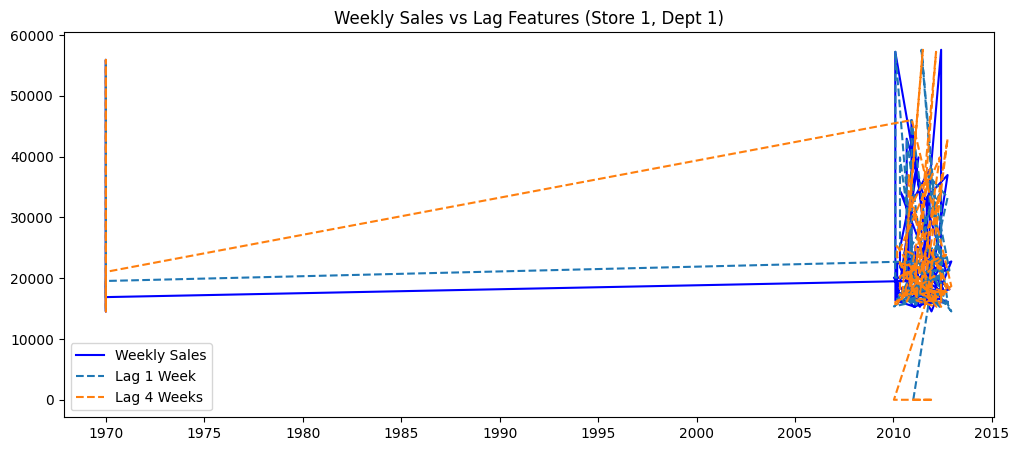

In [12]:
import matplotlib.pyplot as plt
example = df[(df['Store']==1) & (df['Dept']==1)].set_index('Date')

plt.figure(figsize=(12,5))
plt.plot(example.index, example['Weekly_Sales'], label='Weekly Sales', color='blue')
plt.plot(example.index, example['Lag_1'], label='Lag 1 Week', linestyle='--')
plt.plot(example.index, example['Lag_4'], label='Lag 4 Weeks', linestyle='--')
plt.title("Weekly Sales vs Lag Features (Store 1, Dept 1)")
plt.legend()
plt.show()


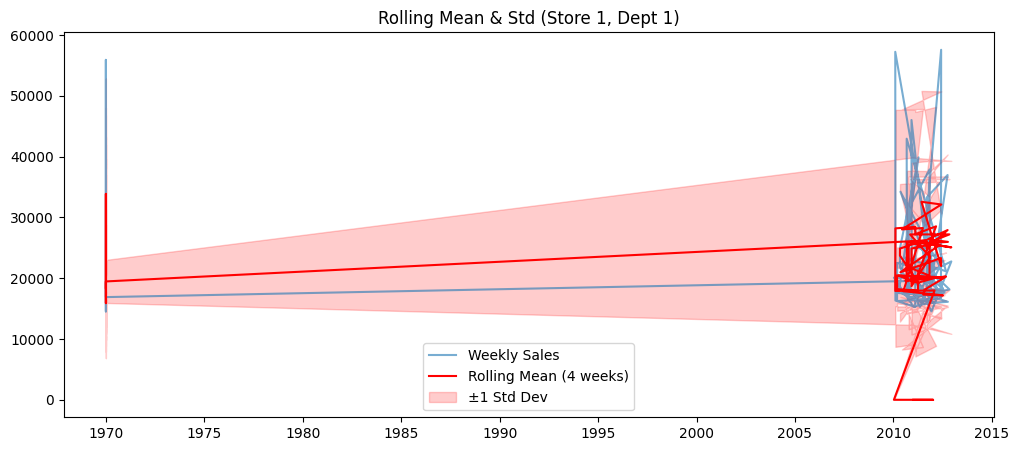

In [13]:
plt.figure(figsize=(12,5))
plt.plot(example.index, example['Weekly_Sales'], label='Weekly Sales', alpha=0.6)
plt.plot(example.index, example['Roll_Mean_4'], label='Rolling Mean (4 weeks)', color='red')
plt.fill_between(example.index, 
                 example['Roll_Mean_4'] - example['Roll_Std_4'], 
                 example['Roll_Mean_4'] + example['Roll_Std_4'], 
                 color='red', alpha=0.2, label='±1 Std Dev')
plt.title("Rolling Mean & Std (Store 1, Dept 1)")
plt.legend()
plt.show()


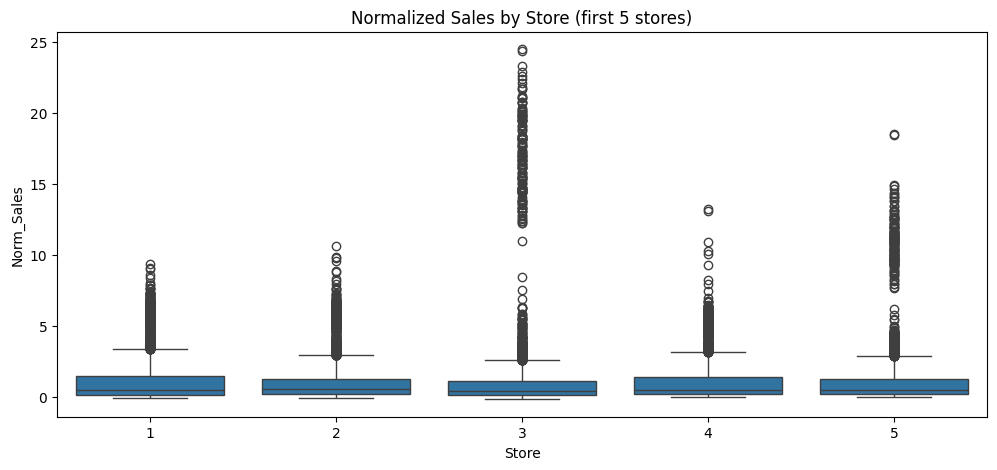

In [15]:
import seaborn as sns
plt.figure(figsize=(12,5))
sns.boxplot(x='Store', y='Norm_Sales', data=df[df['Store'].isin([1,2,3,4,5])])
plt.title("Normalized Sales by Store (first 5 stores)")
plt.show()


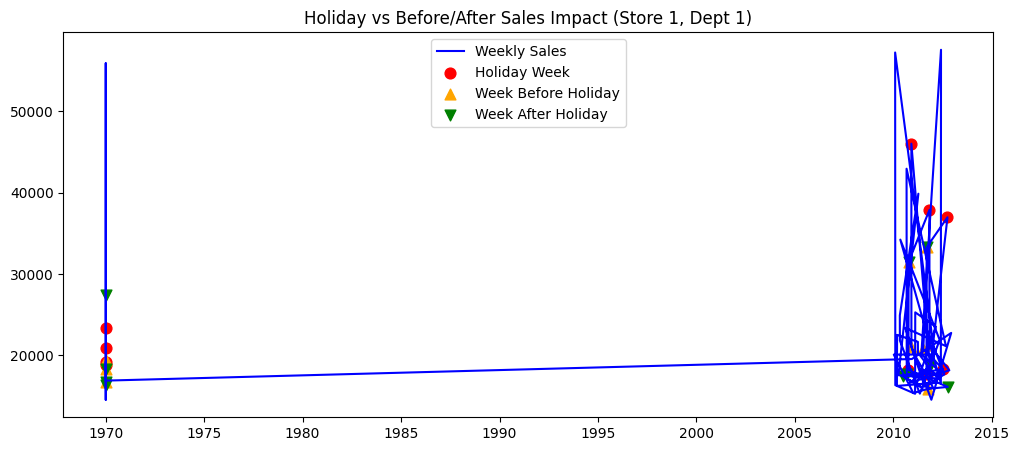

In [16]:
subset = df[(df['Store']==1) & (df['Dept']==1)]

plt.figure(figsize=(12,5))
plt.plot(subset['Date'], subset['Weekly_Sales'], label="Weekly Sales", color="blue")
plt.scatter(subset.loc[subset['IsHoliday'], 'Date'], subset.loc[subset['IsHoliday'], 'Weekly_Sales'], 
            color='red', label="Holiday Week", marker="o", s=60)
plt.scatter(subset.loc[subset['Holiday_Before'], 'Date'], subset.loc[subset['Holiday_Before'], 'Weekly_Sales'], 
            color='orange', label="Week Before Holiday", marker="^", s=60)
plt.scatter(subset.loc[subset['Holiday_After'], 'Date'], subset.loc[subset['Holiday_After'], 'Weekly_Sales'], 
            color='green', label="Week After Holiday", marker="v", s=60)
plt.title("Holiday vs Before/After Sales Impact (Store 1, Dept 1)")
plt.legend()
plt.show()
